# Inicio y carga de datos

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown --id 1sjcx1kAsGBZFXOodOVISw0Om1xv4cPfe -O Pump_initial_data.csv
!gdown --id 1OnuU_bUcGAfvI8-2uibaVd-seF0XmIY0 -O tanzania.geojson

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1sjcx1kAsGBZFXOodOVISw0Om1xv4cPfe
To: /content/Pump_initial_data.csv
100% 20.8M/20.8M [00:00<00:00, 103MB/s] 
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1OnuU_bUcGAfvI8-2uibaVd-seF0XmIY0
To: /content/tanzania.geojson
100% 6.69M/6.69M [00:00<00:00, 45.6MB/s]


In [ ]:
custom_colors = {'functional': '#adf7b6',   # Verde pastel
        'functional needs repair': '#ffee93', # Amarillo pastel
        'non functional': '#f68c70'  # Rojo pastel
                 }

In [ ]:
pumps_df=pd.read_csv("Pump_initial_data.csv", parse_dates=['date_recorded'], date_format='%d/%m/%Y')

In [ ]:
#Opcion de carga local
# pumps_df=pd.read_csv("./data/Pump_initial_data.csv", parse_dates=['date_recorded'], date_format='%d/%m/%Y')

In [ ]:
pumps_df.shape

(59400, 41)

In [ ]:
pumps_df.dtypes

id                                int64
amount_tsh                      float64
date_recorded            datetime64[ns]
funder                           object
gps_height                        int64
installer                        object
longitude                       float64
latitude                        float64
wpt_name                         object
num_private                       int64
basin                            object
subvillage                       object
region                           object
region_code                       int64
district_code                     int64
lga                              object
ward                             object
population                        int64
public_meeting                   object
recorded_by                      object
scheme_management                object
scheme_name                      object
permit                           object
construction_year                 int64
extraction_type                  object
extraction_type_group            object
extraction_type_class            object
management                       object
management_group                 object
payment                          object
payment_type                     object
water_quality                    object
quality_group                    object
quantity                         object
quantity_group                   object
source                           object
source_type                      object
source_class                     object
waterpoint_type                  object
waterpoint_type_group            object
status_group                     object
dtype: object

# Revisión de datos nulos generales

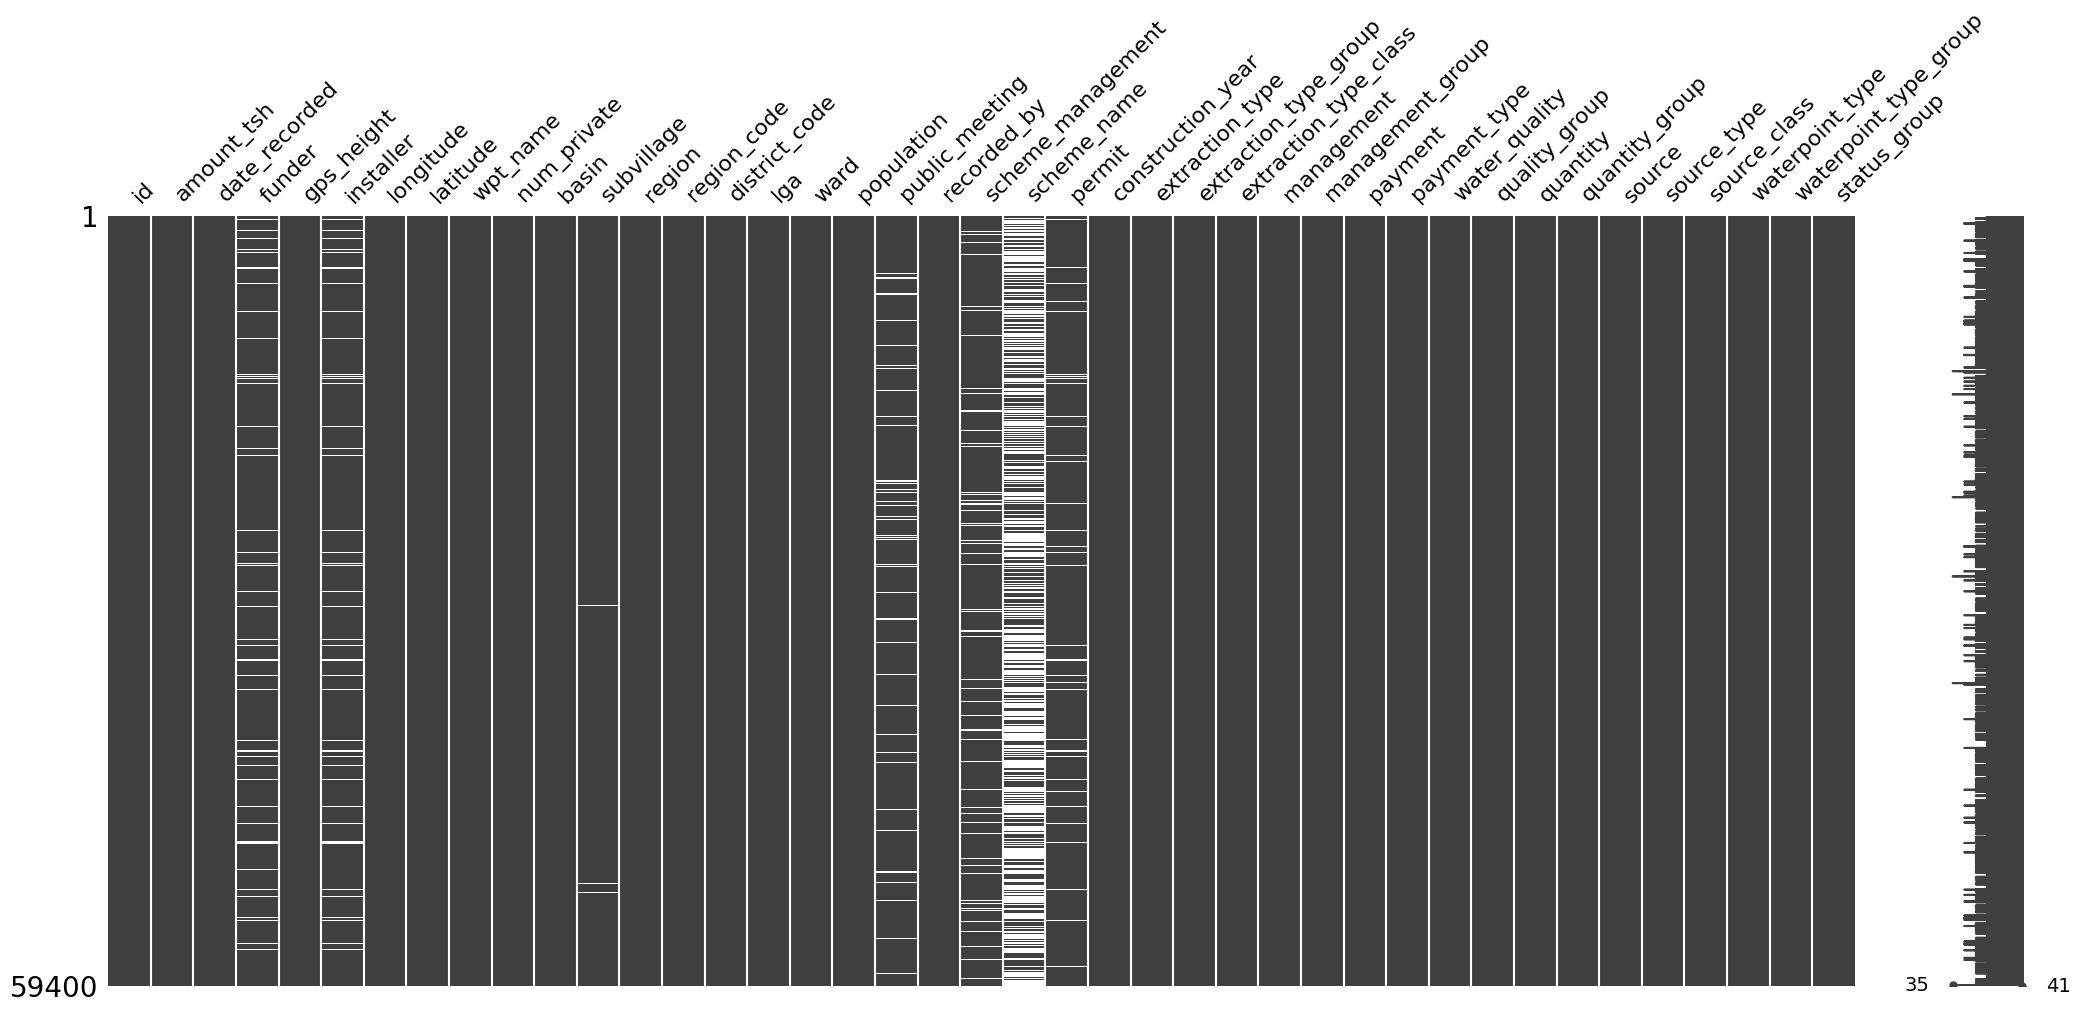

In [ ]:
import missingno as msno

# Visualizar los valores nulos en el DataFrame
msno.matrix(pumps_df)
plt.show()

# Analisis Univariado

## Status

In [ ]:
pumps_df['status_group'].value_counts(normalize=True, dropna=False)

status_group
functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: proportion, dtype: float64

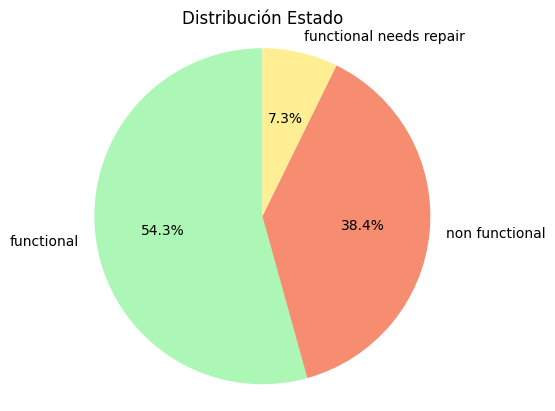

In [ ]:
x=pumps_df['status_group'].value_counts(normalize=True)

fig, ax = plt.subplots()
ax.pie(x.values, labels=x.index, autopct='%1.1f%%', colors=[custom_colors[i] for i in x.index], startangle=90)
ax.axis('equal')
plt.title('Distribución Estado')
fig.patch.set_facecolor('none')

plt.show()

## Amount_tsh

In [ ]:
pumps_df['amount_tsh'].describe(percentiles=[.5,.75,.80,.85,.90,.95,.99])

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
50%           0.000000
75%          20.000000
80%          50.000000
85%         250.000000
90%         500.000000
95%        1200.000000
99%        5000.000000
max      350000.000000
Name: amount_tsh, dtype: float64

In [ ]:
print(pumps_df['amount_tsh'].kurtosis())
print(pumps_df['amount_tsh'].skew())

4903.543101955053
57.8077999458852


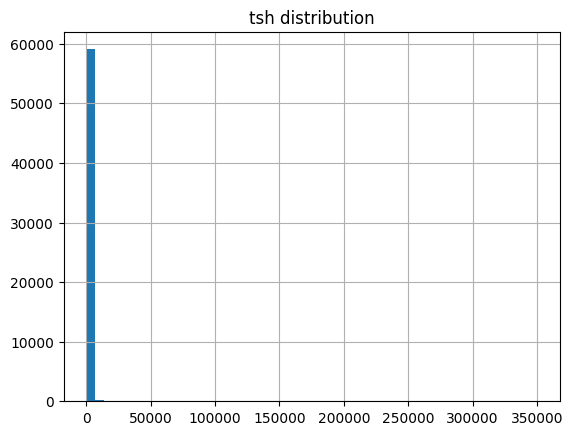

In [ ]:
pumps_df['amount_tsh'].hist(bins=50)
plt.title('tsh distribution')
plt.show()

In [ ]:
#Porcentaje de 0
(pumps_df[pumps_df['amount_tsh']==0].shape[0]/pumps_df.shape[0])*100

70.09932659932659

In [ ]:
#valores superiores
print(pumps_df[pumps_df['amount_tsh']>5000].shape[0])
print((pumps_df[pumps_df['amount_tsh']>5000].shape[0]/pumps_df.shape[0])*100)

470
0.7912457912457913


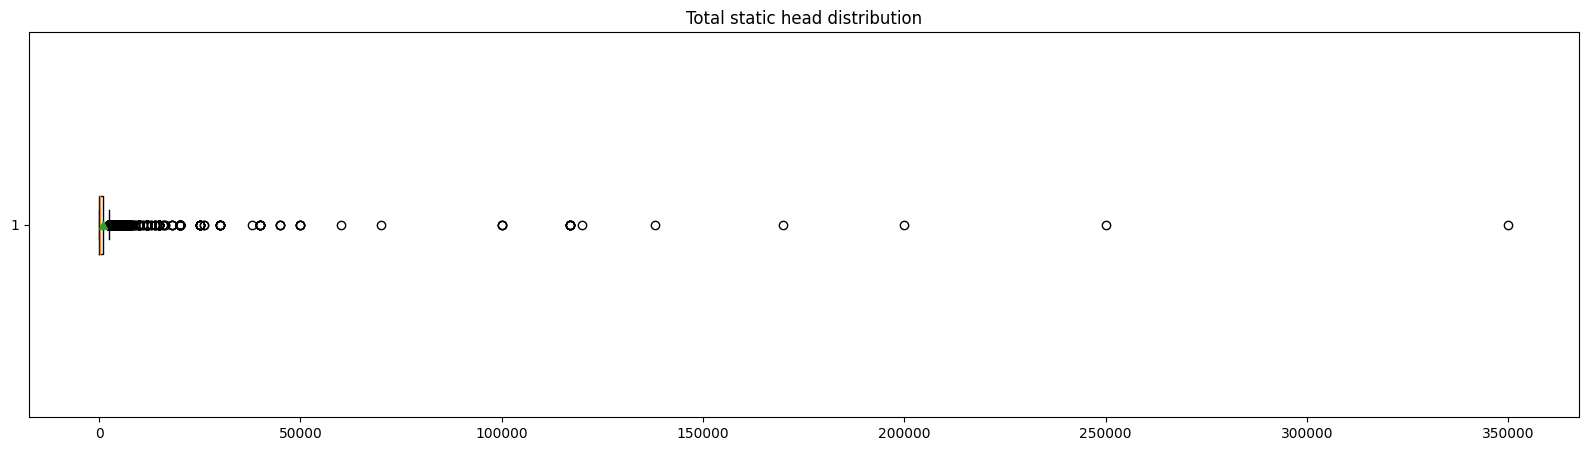

In [ ]:
plt.figure(figsize=(20, 5))
plt.boxplot(pumps_df[pumps_df['amount_tsh']>0]['amount_tsh'], showmeans=True, vert=False)
plt.title("Total static head distribution")
plt.show()

Supuesto: A mayor distancia mayor probabilidad de que necesite mantenimiento o que se dañe la bomba.

## date recorded

In [ ]:
pumps_df['date_recorded'].dt.year.value_counts(normalize=True, dropna=False)

date_recorded
2011    0.482727
2013    0.408603
2012    0.108148
2004    0.000505
2002    0.000017
Name: proportion, dtype: float64

In [ ]:
pumps_df['date_recorded'].dt.month.value_counts(normalize=True, dropna=False)

date_recorded
3     0.301953
2     0.208788
7     0.116633
1     0.106970
10    0.092020
4     0.066835
8     0.056633
11    0.022710
12    0.010455
6     0.005825
5     0.005657
9     0.005522
Name: proportion, dtype: float64

## Funder

In [ ]:
pumps_df['funder'].value_counts(normalize=True, dropna=False)

funder
Government Of Tanzania    0.152929
NaN                       0.061229
Danida                    0.052424
Hesawa                    0.037071
Rwssp                     0.023131
                            ...   
Rarymond Ekura            0.000017
Justine Marwa             0.000017
Municipal Council         0.000017
Afdp                      0.000017
Samlo                     0.000017
Name: proportion, Length: 1897, dtype: float64

## Gps height

In [ ]:
pumps_df['gps_height'].describe()

count    59400.000000
mean       668.297239
std        693.116350
min        -90.000000
25%          0.000000
50%        369.000000
75%       1319.250000
max       2770.000000
Name: gps_height, dtype: float64

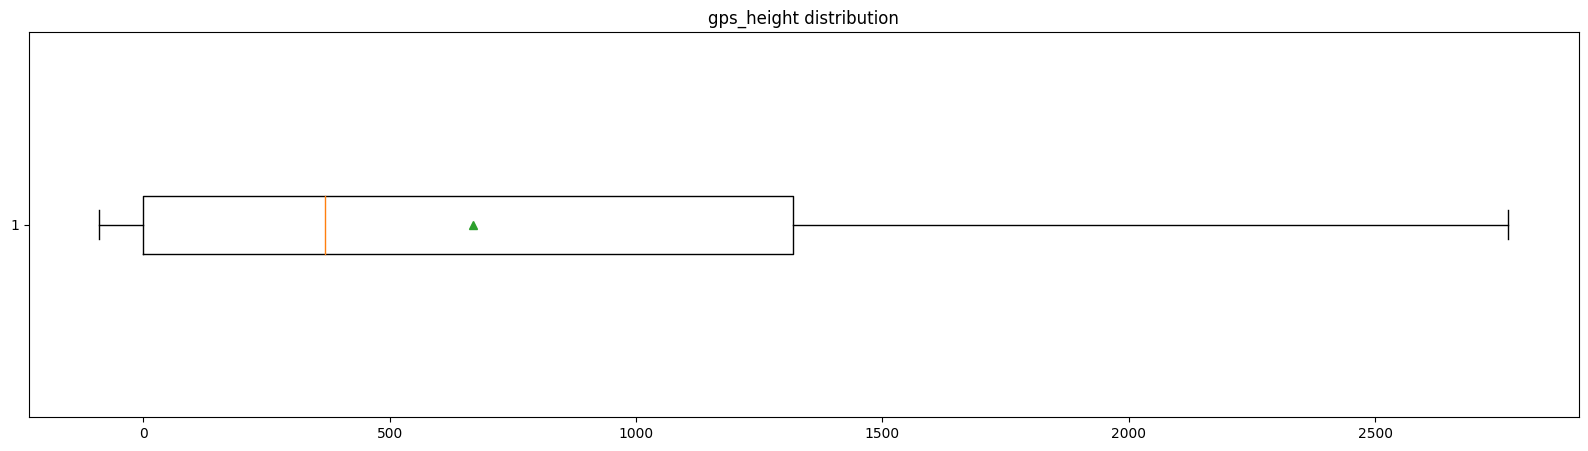

In [ ]:
plt.figure(figsize=(20, 5))
plt.boxplot(pumps_df['gps_height'], showmeans=True, vert=False)
plt.title("gps_height distribution")
plt.show()

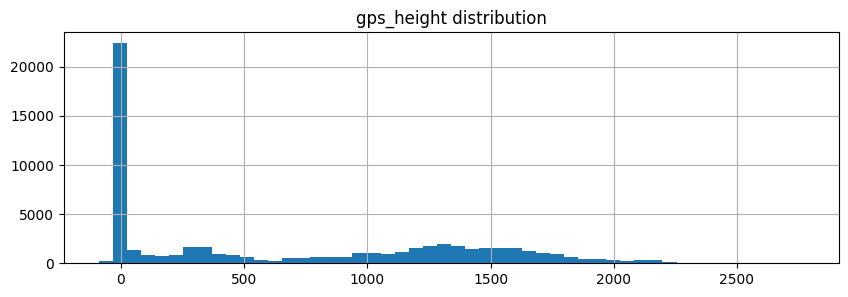

In [ ]:
pumps_df['gps_height'].hist(bins=50,figsize=(10, 3))
plt.title('gps_height distribution')
plt.show()

In [ ]:
#Porcentaje de 0
(pumps_df[pumps_df['gps_height']==0].shape[0]/pumps_df.shape[0])*100

34.40740740740741

In [ ]:
print('Cantidad de pozos con altura negativa:',pumps_df[pumps_df['gps_height']<0].shape[0])

#pumps with negative height
x=pumps_df[pumps_df['gps_height']<0][['latitude','longitude']].copy()
f = folium.Figure(width=600, height=500)
map = folium.Map(location=[-6.768373, 34.982544], zoom_start=6).add_to(f)

for loc in zip(x['latitude'],x['longitude']):
    folium.Circle(location=loc,fill=True).add_to(map)

map

In [ ]:
q90=pumps_df['gps_height'].quantile(0.95)
print('Cuantile 90 de altura:',q90,'metros')
print('Cantidad de pozos con altura mayor a q90:',pumps_df[pumps_df['gps_height']>q90].shape[0])

#pumps with negative height
x=pumps_df[pumps_df['gps_height']>=q90][['latitude','longitude']].copy()
f = folium.Figure(width=600, height=500)
map = folium.Map(location=[-6.768373, 34.982544], zoom_start=6).add_to(f)

for loc in zip(x['latitude'],x['longitude']):
    folium.Circle(location=loc,fill=True).add_to(map)

map

## Installer

In [ ]:
pumps_df['installer'].value_counts(normalize=True,dropna=False)

installer
DWE                0.292963
NaN                0.061532
Government         0.030724
RWE                0.020303
Commu              0.017845
                     ...   
Wizara  ya maji    0.000017
TWESS              0.000017
Nasan workers      0.000017
R                  0.000017
SELEPTA            0.000017
Name: proportion, Length: 2146, dtype: float64

2146


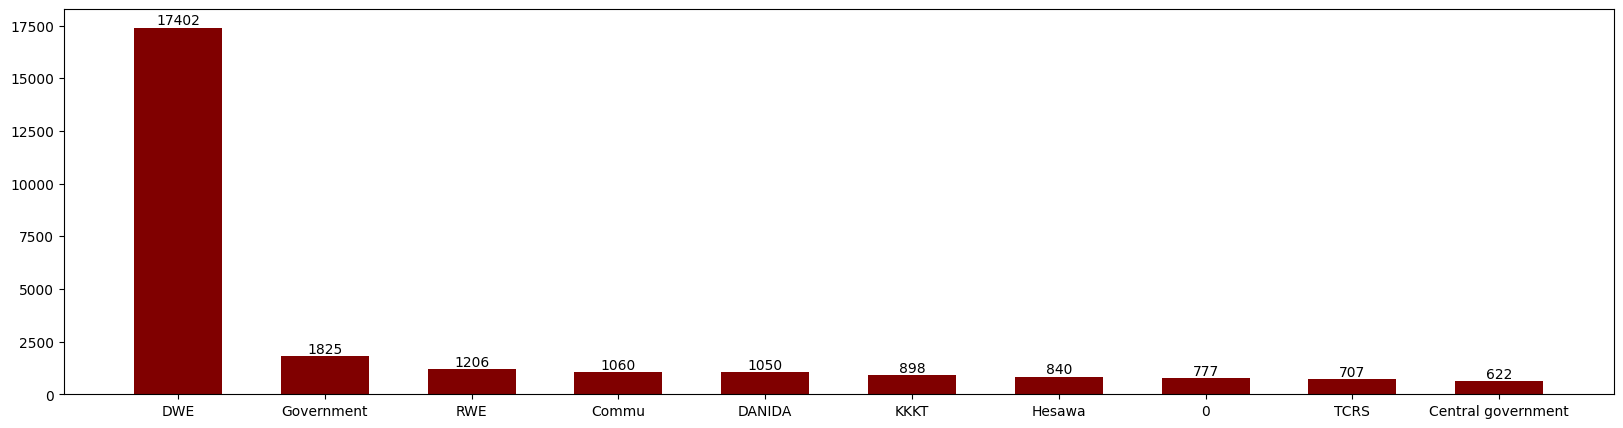

In [ ]:
print(len(pumps_df['installer'].unique()))

x=pumps_df['installer'].value_counts().head(10)
fig, ax = plt.subplots(figsize = (20, 5))
bars = ax.bar(x.index, x.values, color ='maroon', width = 0.6)
ax.bar_label(bars)
plt.show()

## WPT name

In [ ]:
pumps_df['wpt_name'].value_counts(normalize=True,dropna=False)


wpt_name
none                       0.059983
Shuleni                    0.029428
Zahanati                   0.013973
Msikitini                  0.009007
Kanisani                   0.005438
                             ...   
Kwa Medadi                 0.000017
Kwa Kubembeni              0.000017
Shule Ya Msingi Milanzi    0.000017
Funua                      0.000017
Kwa Mzee Lugawa            0.000017
Name: proportion, Length: 37400, dtype: float64

## Num pivate

In [ ]:
pumps_df['num_private'].value_counts(normalize=True,dropna=False).cumsum()

num_private
0       0.987256
6       0.988620
1       0.989848
5       0.990623
8       0.991397
          ...   
42      0.999933
23      0.999949
136     0.999966
698     0.999983
1402    1.000000
Name: proportion, Length: 65, dtype: float64

# Analisis Multivariado

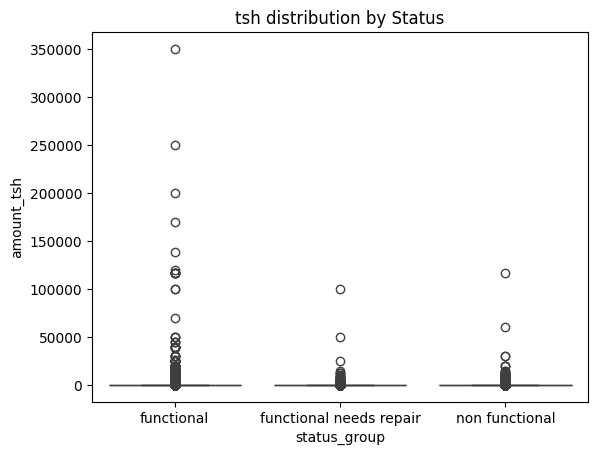

In [ ]:
sns.boxplot(x=pumps_df['status_group'], y=pumps_df['amount_tsh'], order=['functional','functional needs repair','non functional'])
plt.title('tsh distribution by Status')
plt.show()

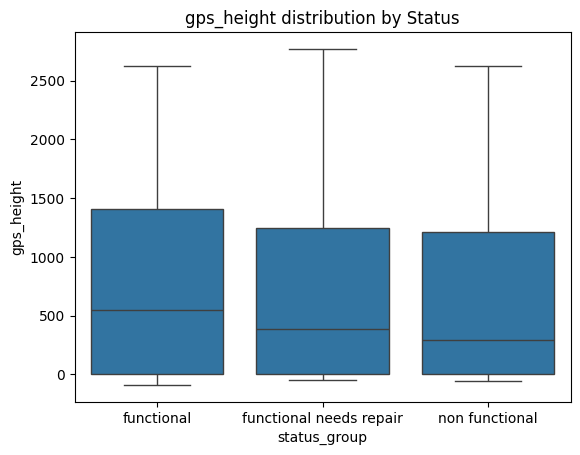

In [ ]:
sns.boxplot(x=pumps_df['status_group'], y=pumps_df['gps_height'], order=['functional','functional needs repair','non functional'])
plt.title('gps_height distribution by Status')
plt.show()

In [ ]:
#pumps by status
x=pumps_df[['latitude','longitude','status_group']].copy()
x['status_group_colour']=x['status_group'].apply(lambda x: 'green' if x=='functional' else ('red' if x=='non functional' else 'yellow'))
f = folium.Figure(width=960, height=800)
map = folium.Map(location=[-6.268373, 34.982544], zoom_start=6).add_to(f)

for loc,p in zip(zip(x['latitude'],x['longitude']),x['status_group_colour']):
  folium.Circle(location=loc,fill=True,color=p).add_to(map)

map

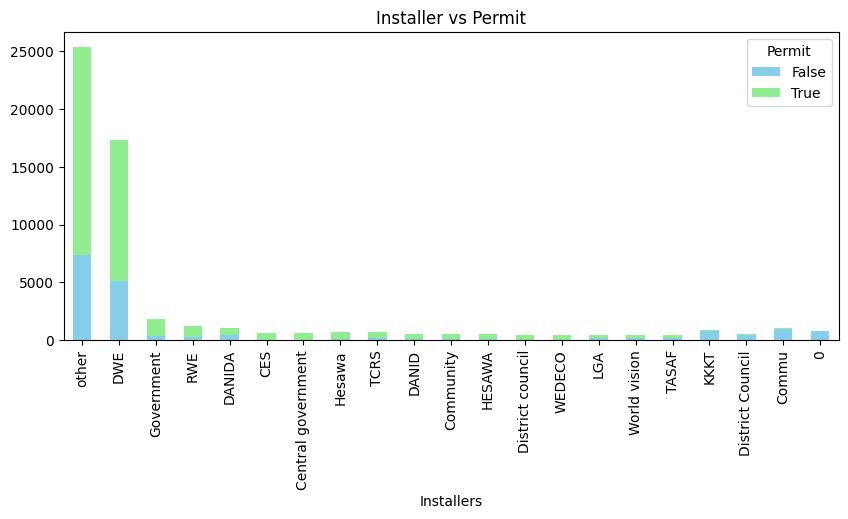

In [ ]:
top_installer=pumps_df['installer'].value_counts().head(20).index
pumps_df['top_installer']=pumps_df['installer'].apply(lambda x: x if x in top_installer else 'other')

tabla_contingencia=pd.crosstab(pumps_df['top_installer'], pumps_df['permit']).sort_values(by=True, ascending=False)

tabla_contingencia.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'], figsize=(10, 4))
plt.title('Installer vs Permit')
plt.xlabel('Installers')
plt.legend(title='Permit')
plt.show()

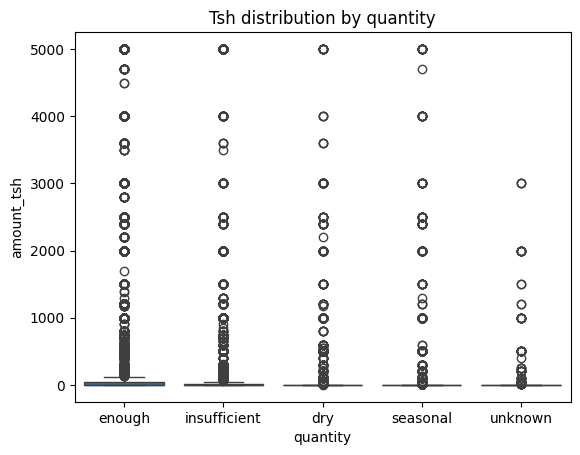

In [ ]:
x=pumps_df['amount_tsh'].apply(lambda x: x/100 if x>10000 else (x/10 if x>5000 else x))

sns.boxplot(x=pumps_df['quantity'], y=x, order=['enough','insufficient','dry','seasonal','unknown'])
# sns.boxplot(x=pumps_df['source'], y=pumps_df['amount_tsh'])
plt.title('Tsh distribution by quantity')
plt.show()

In [ ]:
import json

with open('/content/tanzania.geojson', 'r') as f:
    geojson_data = json.load(f)

In [ ]:
f = folium.Figure(width=600, height=500)
map = folium.Map(location=[-6.768373, 34.982544], zoom_start=6).add_to(f)

folium.GeoJson(geojson_data, name='geojson').add_to(map)
map

In [ ]:
pumps_df['region'].unique()

array(['Iringa', 'Mara', 'Manyara', 'Mtwara', 'Kagera', 'Tanga',
       'Shinyanga', 'Tabora', 'Pwani', 'Ruvuma', 'Kilimanjaro', 'Rukwa',
       'Mwanza', 'Kigoma', 'Lindi', 'Dodoma', 'Arusha', 'Mbeya',
       'Singida', 'Morogoro', 'Dar es Salaam'], dtype=object)

In [ ]:
#pumps by status
x=pumps_df[['latitude','longitude','population']].copy()
x['population_norm'] = (x['population'] - x['population'].min()) / (x['population'].max() - x['population'].min())

f = folium.Figure(width=600, height=500)
map = folium.Map(location=[-6.268373, 34.982544], zoom_start=6).add_to(f)

for loc,p in zip(zip(x['latitude'],x['longitude']),x['population_norm']):
  folium.CircleMarker(location=loc,fill=True,radius=p).add_to(map)
map

<Figure size 1000x400 with 0 Axes>

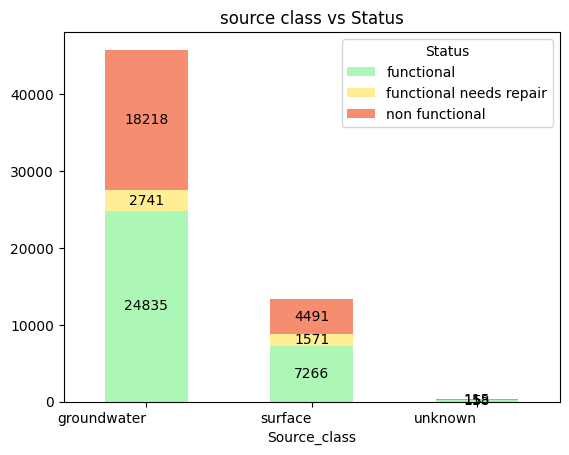

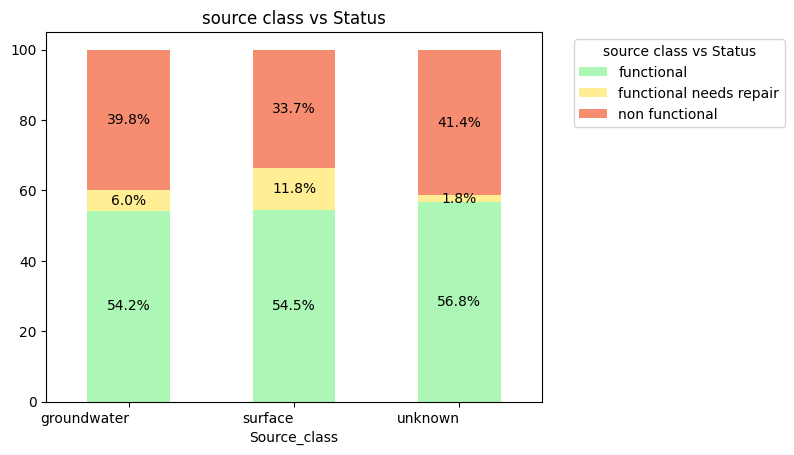

In [ ]:
tabla_contingencia=pd.crosstab(pumps_df['source_class'], pumps_df['status_group'])
tabla_contingencia_perce=pd.crosstab(pumps_df['source_class'], pumps_df['status_group'], normalize='index') * 100

plt.figure(figsize=(10, 4))
ax = tabla_contingencia.plot(kind='bar', stacked=True, color=custom_colors)
for bars in ax.containers:
        ax.bar_label(bars, label_type='center', fontsize=10)
plt.title('source class vs Status')
plt.xlabel('Source_class')
plt.legend(title='Status')
plt.xticks(rotation=0, ha='right')
plt.show()

ax1 = tabla_contingencia_perce.plot(kind='bar', stacked=True, color=custom_colors)
for bars in ax1.containers:
        ax1.bar_label(bars, fmt='%.1f%%', label_type='center', fontsize=10)

plt.title('source class vs Status')
plt.xlabel('Source_class')
plt.legend(title='Status')
plt.xticks(rotation=0, ha='right')
plt.legend(title='source class vs Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

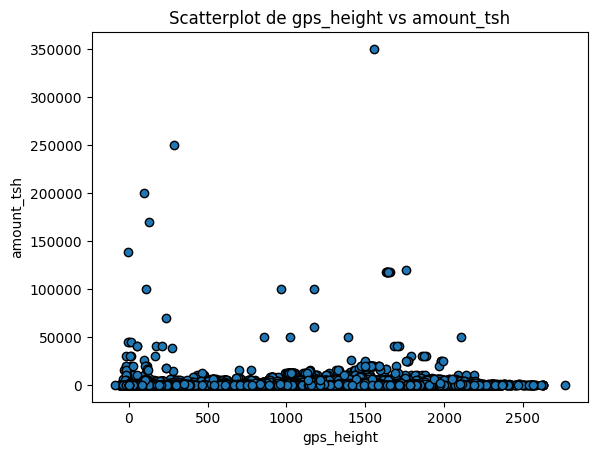

In [ ]:
plt.scatter(pumps_df['gps_height'], pumps_df['amount_tsh'], edgecolor='black')
#Unicamente gps negativo
# plt.scatter(pumps_df[pumps_df['gps_height']<0]['gps_height'], pumps_df[pumps_df['gps_height']<0]['amount_tsh'], edgecolor='black')

# Etiquetas y título
plt.xlabel("gps_height")
plt.ylabel("amount_tsh")
plt.title("Scatterplot de gps_height vs amount_tsh")

# Mostrar la gráfica
plt.show()


# Final